In [242]:
#creating a llm and rag  workflow with groq using langgraph

In [240]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [175]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [176]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
from langgraph.graph import Graph
from IPython.display import display,Image

In [177]:
llm=ChatGroq(model="gemma2-9b-it")

In [178]:
def function_1(AgentState):
    messages=AgentState["messages"]
    question=messages[-1]
    response=llm.invoke(question)
    AgentState["messages"].append(response.content)
    return AgentState

In [179]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS

In [180]:
os.environ["HF_TOKEN"]=os.getenv("HF_TOKEN")

In [181]:
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [182]:
loader=PyPDFLoader("C:\\Users\\user\\OneDrive\\Desktop\\langchain\\temp.pdf")
docs=loader.load()

In [183]:
documets=RecursiveCharacterTextSplitter(chunk_size=400,chunk_overlap=50).split_documents(docs)

In [184]:
documets

[Document(metadata={'source': 'C:\\Users\\user\\OneDrive\\Desktop\\langchain\\temp.pdf', 'page': 0}, page_content='From Wikipedia, the free encyclopedia \nAn illustration of main components of the \ntransformer model from the paper \n"Attention Is All You Need"[1] is a 2017 landmark[2][3] research paper in machine learning authored by \neight scientists working at Google. The paper introduced a new deep learning architecture known as'),
 Document(metadata={'source': 'C:\\Users\\user\\OneDrive\\Desktop\\langchain\\temp.pdf', 'page': 0}, page_content='the transformer, based on the attention mechanism proposed in 2014 by Bahdanau et al.[4] It is \nconsidered a foundational[5] paper in modern artificial intelligence, as the transformer approach has \nbecome the main architecture of large language models like those based on GPT.[6][7] At the time, the'),
 Document(metadata={'source': 'C:\\Users\\user\\OneDrive\\Desktop\\langchain\\temp.pdf', 'page': 0}, page_content='focus of the research w

In [185]:
db=FAISS.from_documents(embedding=embeddings,documents=documets)

In [186]:
retriever=db.as_retriever()

In [187]:
retriever

VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000024121E19040>, search_kwargs={})

In [188]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

In [ ]:
def function_2(AgentState):
    messages=AgentState["messages"]
    question=messages[0]
    #print(question)
    template="""Answer the following question based on the given context
    {context}
    Question:{question}
    """

    prompt=ChatPromptTemplate.from_template(template)

    retrieval=prompt|llm|StrOutputParser()

    response=retrieval.invoke({"context":retriever,"question":question})

    return response

In [190]:
workflow=Graph()

In [191]:
workflow.add_node("llm",function_1)

In [192]:
workflow.add_node("rag",function_2)

In [193]:
workflow.add_edge("llm","rag")

In [194]:
workflow.set_entry_point("llm")

In [195]:
workflow.set_finish_point("rag")

In [196]:
graph=workflow.compile()

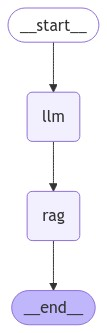

In [197]:
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [198]:
input={"messages":["what is transformer"]}

In [ ]:
for output in graph.stream(input):
    for key,value in output.items():
        #key==>node,value==>output
        print(f"here the output is '{key}':")
        print("----------")
        print(value,end=" ")

here the output is 'llm':
----------
{'messages': ['what is transformer', "Let's break down transformers in the realm of artificial intelligence.\n\n**What is a Transformer?**\n\nAt its core, a transformer is a powerful type of neural network architecture specifically designed for processing sequential data, like text or time series.  They've revolutionized natural language processing (NLP) and are increasingly used in other fields.\n\n**Key Features:**\n\n* **Attention Mechanism:** This is the heart of a transformer. It allows the model to focus on specific parts of the input sequence that are most relevant to the task at hand. Imagine reading a sentence and naturally emphasizing certain words based on context – that's what attention does.\n* **Encoder-Decoder Structure:** Transformers typically consist of two main parts:\n    * **Encoder:**  Processes the input sequence, understanding its structure and meaning.\n    * **Decoder:** Generates the output sequence, using the encoder's un

In [234]:
def function_3(mass):
    message=mass["message"]
    print(type(mass))
    question=message[0]
    print(question)
    return question

In [237]:
mass={}

In [238]:
mass["message"]=[]

In [239]:
mass

{'message': []}

In [235]:
input={"message":["hello,how are you"]}

In [236]:
answer=function_3(input)

<class 'dict'>
hello,how are you


In [230]:
answer

'hello,how are you'

In [204]:
input1={"message":["hello,how is your job"]}

In [205]:
answer=function_3(input1)

In [208]:
answer

'hello,how is your job'

In [215]:
student_detail=({"name":"nithish","age":22})

In [216]:
student_detail

{'name': 'nithish', 'age': 22}

In [219]:
student_detail["name"]="kumar"

In [220]:
student_detail

{'name': 'kumar', 'age': 22}